In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
transform = transforms.ToTensor()


In [40]:
train_data_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [41]:
batch_sizes = [10, 20, 40, 100, 400]
train_loader1 = DataLoader(train_data_set, batch_size=batch_sizes[0], shuffle=True)
test_loader1 = DataLoader(test_data_set, batch_size=batch_sizes[0], shuffle=True)

train_loader2 = DataLoader(train_data_set, batch_size=batch_sizes[1], shuffle=True)
test_loader2 = DataLoader(test_data_set, batch_size=batch_sizes[1], shuffle=True)

train_loader3 = DataLoader(train_data_set, batch_size=batch_sizes[2], shuffle=True)
test_loader3 = DataLoader(test_data_set, batch_size=batch_sizes[2], shuffle=True)

train_loader4 = DataLoader(train_data_set, batch_size=batch_sizes[3], shuffle=True)
test_loader4 = DataLoader(test_data_set, batch_size=batch_sizes[3], shuffle=True)

train_loader5 = DataLoader(train_data_set, batch_size=batch_sizes[4], shuffle=True)
test_loader5 = DataLoader(test_data_set, batch_size=batch_sizes[4], shuffle=True)

In [42]:
def CalcPara(model):
    val = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return val

In [43]:
class Model1(nn.Module):
    def __init__(self, in_features=784, h1=10, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [45]:
model1=Model1()
model1params=CalcPara(model1)
print(model1params)

8280


In [46]:
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.0001)

In [47]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model1(X_train.view(10, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod1=loss
    train_correct_mod1.append(train_corr)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            # Apply the model
            y_val = model1(X_test.view(10, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion1(y_val, y_test)
    test_losses_mod1=(loss)
    test_correct_mod1.append(test_corr)

In [48]:
train_losses_mod1= train_losses_mod1.detach().numpy()

In [49]:
 for t in train_correct_mod1:
    trn_accu_mod1=t/600

In [50]:
 for t in test_correct_mod1:
    tst_accu_mod1=t/100

In [51]:
# Calculate sensitivity of  model 1
sensitivity_list = []

# Model 1
# Get gradient norm (From slides)
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model1.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

# Model 2

In [52]:
class Model2(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [53]:
model2=Model2()

In [54]:
model2params=CalcPara(model2)
print(model2params)

16330


In [55]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.0001)

In [56]:
epochs = 10
train_correct_mod2 = []
test_correct_mod2 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader2):
        
        y_pred = model2(X_train.view(20, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod2=loss
    train_correct_mod2.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

            # Apply the model
            y_val = model2(X_test.view(20, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion2(y_val, y_test)
    test_losses_mod2=(loss)
    test_correct_mod2.append(test_corr)
    

In [59]:
train_losses_mod2= train_losses_mod2.detach().numpy()
for t in train_correct_mod2:
    trn_accu_mod2=t/600
    


In [60]:
 for t in test_correct_mod2:
    tst_accu_mod2=t/100

In [61]:
# Calculating sensitivity of  model2

# Model 2
# Get gradient norm 
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model2.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

# Model 3

In [62]:
class Model3(nn.Module):
    def __init__(self, in_features=784, h1=30, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [63]:
model3=Model3()

In [64]:
model3params=CalcPara(model3)
print(model3params)

24380


In [65]:
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.0001)

In [66]:
epochs = 10
train_correct_mod3 = []
test_correct_mod3 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader3):
       
        y_pred = model3(X_train.view(40, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod3=loss
    train_correct_mod3.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader3):

            # Apply the model
            y_val = model3(X_test.view(40, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion3(y_val, y_test)
    test_losses_mod3=(loss)
    test_correct_mod3.append(test_corr)

In [67]:
train_losses_mod3= train_losses_mod3.detach().numpy()
for t in train_correct_mod3:
    trn_accu_mod3=t/600

In [68]:
 for t in test_correct_mod3:
    tst_accu_mod3=t/100

In [69]:
# Calculating sensitivity of  model3

# Model 3
# Get gradient norm 
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model3.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

# Model 4

In [70]:
class Model4(nn.Module):
    def __init__(self, in_features=784, h1=40, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [71]:
model4=Model4()

In [72]:
model4params=CalcPara(model4)
print(model4params)

32430


In [73]:
criterion4 = nn.CrossEntropyLoss()
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.0001)

In [74]:
epochs = 10
train_correct_mod4 = []
test_correct_mod4 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader4):
        
        y_pred = model4(X_train.view(100, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer4.zero_grad()
        loss.backward()
        optimizer4.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod4=loss
    train_correct_mod4.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader4):

            # Apply the model
            y_val = model4(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion4(y_val, y_test)
    test_losses_mod4=(loss)
    test_correct_mod4.append(test_corr)

In [75]:
train_losses_mod4= train_losses_mod4.detach().numpy()
for t in train_correct_mod4:
    trn_accu_mod4=t/600

In [76]:
 for t in test_correct_mod4:
    tst_accu_mod4=t/100

In [77]:
# Calculating sensitivity of  model4

# Get gradient norm
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model4.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

# model 5

In [78]:
class Model5(nn.Module):
    def __init__(self, in_features=784, h1=50, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [79]:
model5=Model5()

In [80]:
model5params=CalcPara(model5)
print(model5params)

40480


In [81]:
criterion5 = nn.CrossEntropyLoss()
optimizer5 = torch.optim.Adam(model5.parameters(), lr=0.0001)

In [82]:
epochs = 10
train_correct_mod5 = []
test_correct_mod5 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader5):
       
        y_pred = model5(X_train.view(400, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer5.zero_grad()
        loss.backward()
        optimizer5.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod5=loss
    train_correct_mod5.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader5):

            # Apply the model
            y_val = model5(X_test.view(400, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion5(y_val, y_test)
    test_losses_mod5=(loss)
    test_correct_mod5.append(test_corr)

In [83]:
train_losses_mod5= train_losses_mod5.detach().numpy()
for t in train_correct_mod5:
    trn_accu_mod5=t/600


In [84]:
for t in test_correct_mod5:
    tst_accu_mod5=t/100

In [85]:
# Calculating sensitivity of model5

# Get gradient norm 
grad_all = 0.0
frob_norm_all = 0
counter = 0
for p in model5.parameters():
    grad = 0.0
    if p.grad is not None:
        grad = p.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        frob_norm_all += frob_norm
        counter += 1
sensitivity_list.append(frob_norm_all / counter)

In [86]:
train_loss_list=[]
test_loss_list=[]
train_accuracy_list=[]
test_accuracy_list=[]

train_loss_list.append(train_losses_mod1)
train_loss_list.append(train_losses_mod2)
train_loss_list.append(train_losses_mod3)
train_loss_list.append(train_losses_mod4)
train_loss_list.append(train_losses_mod5)

test_loss_list.append(test_losses_mod1)
test_loss_list.append(test_losses_mod2)
test_loss_list.append(test_losses_mod3)
test_loss_list.append(test_losses_mod4)
test_loss_list.append(test_losses_mod5)

train_accuracy_list.append(trn_accu_mod1)
train_accuracy_list.append(trn_accu_mod2)
train_accuracy_list.append(trn_accu_mod3)
train_accuracy_list.append(trn_accu_mod4)
train_accuracy_list.append(trn_accu_mod5)


test_accuracy_list.append(tst_accu_mod1)
test_accuracy_list.append(tst_accu_mod2)
test_accuracy_list.append(tst_accu_mod3)
test_accuracy_list.append(tst_accu_mod4)
test_accuracy_list.append(tst_accu_mod5)

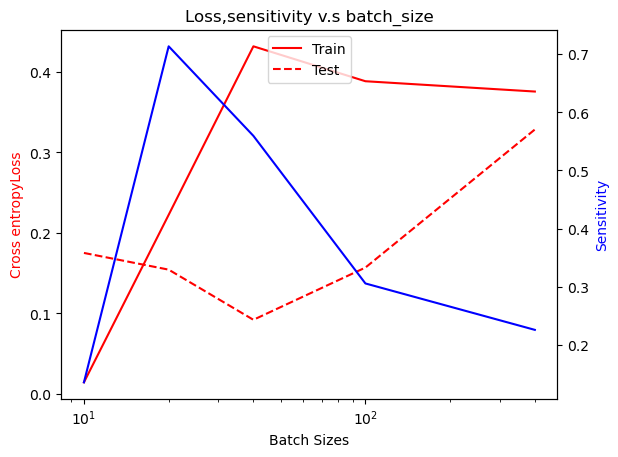

In [88]:
# Visulaize Loss and Sensitivity by batch size of all models 1-5
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(batch_sizes, train_loss_list, 'r', label='Train')
ax1.plot(batch_sizes, test_loss_list, 'r--', label='Test')
ax2.plot(batch_sizes, sensitivity_list, 'b', label='Sensitivity')
ax1.set_title('Loss,sensitivity v.s batch_size')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('Cross entropyLoss', color='r')
ax2.set_ylabel('Sensitivity', color='b')
ax1.legend(loc='upper center')

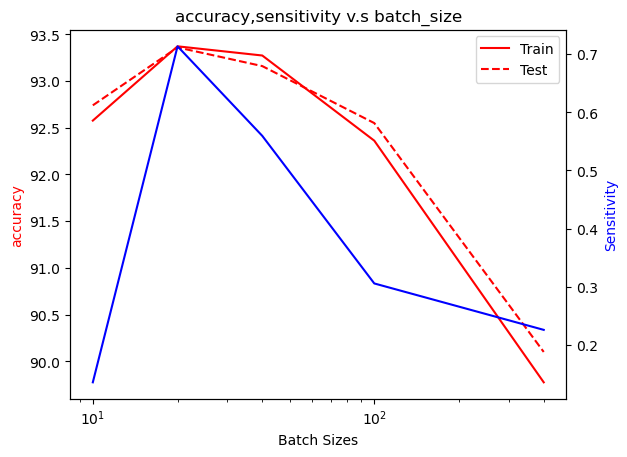

In [89]:
# Visulaize Accuracy and Sensitivity by batch size of all models
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(batch_sizes, train_accuracy_list, 'r', label='Train')
ax1.plot(batch_sizes, test_accuracy_list, 'r--', label='Test')
ax2.plot(batch_sizes, sensitivity_list, 'b', label='Sensitivity')
ax1.set_title('accuracy,sensitivity v.s batch_size')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('accuracy', color='r')
ax2.set_ylabel('Sensitivity', color='b')
ax1.legend(loc='upper right')